In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
        for filename in filenames:
         print(os.path.join(dirname, filename))


/kaggle/input/titanic-datasets/titanic.csv


# Read Data

In [2]:
Data=pd.read_csv("/kaggle/input/titanic-datasets/titanic.csv")

In [3]:
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [4]:
Data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


## Showing statical info

In [5]:
Data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
Data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

In [7]:
Data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
Data.shape

(418, 12)

In [9]:
Data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Data cleaning

In [10]:
Data["Age"].isna().sum()

86

In [11]:
# fill the nan values of ages with average values in coulmn
Data["Age"]=Data["Age"].fillna(Data["Age"].mean())

In [12]:
Data["Age"].isna().sum()

0

In [13]:
Data=Data.drop("Cabin",axis=1)

### Catorize the coulmn based on data type

In [14]:
#obj coulmn
obj_col=[col for col in Data.columns if Data[col].dtype==object]
obj_col

['Name', 'Sex', 'Ticket', 'Embarked']

In [15]:
#numeric Data
num_col=[col for col in Data.columns if Data[col].dtype in ['float32', 'float64', 'int32', 'int64']]
num_col

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
Data.duplicated

<bound method DataFrame.duplicated of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex       Age  SibSp  \
0                                Kelly, Mr. James    male  34.50000      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.00000      1   
2                       Myles, Mr. Thomas Francis    male  62.00000      0   
3                                Wirz, Mr. Albert    male  27.00000      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00000      1   
..                                   

In [17]:
Data=pd.DataFrame(Data)

In [18]:
Data=Data.drop_duplicates()

In [19]:
Data.duplicated().sum()

0

In [20]:
Data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           169
Embarked         3
dtype: int64

## Data visualization

Text(0.5, 1.0, 'Figure that show the relation between gender and survives or not')

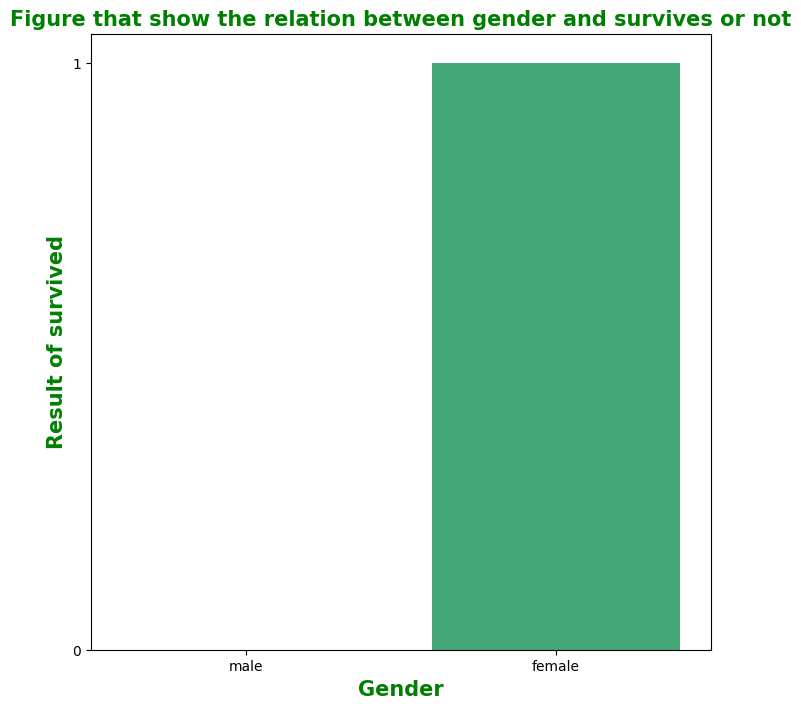

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# create a figure that show the relation between gender and survives or not
plt.figure(figsize=(8,8),clear=False)
sns.barplot(data=Data,x="Sex",y="Survived",palette="viridis")
font={"size":15, "weight":"bold","color":"green"}
plt.xlabel("Gender",fontdict=font)
plt.ylabel("Result of survived",fontdict=font)
plt.yticks([0,1])
plt.title("Figure that show the relation between gender and survives or not",fontdict=font)


Text(0.5, 1.0, 'Figure that show the relation between pclass and survives or not')

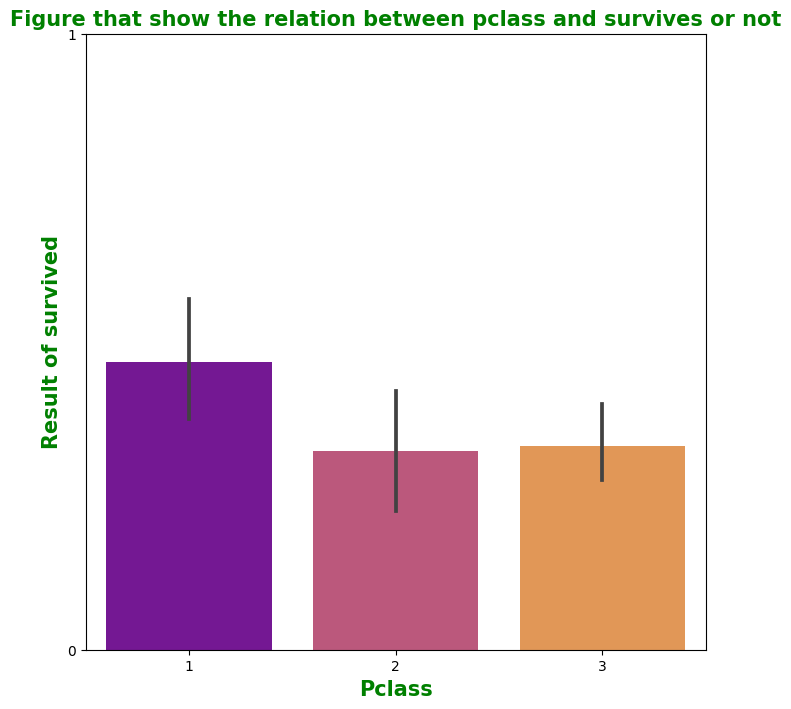

In [22]:
# create a figure that show the relation between pclass and survives or not
plt.figure(figsize=(8,8),clear=False)
sns.barplot(data=Data,x="Pclass",y="Survived",palette="plasma")
font={"size":15, "weight":"bold","color":"green"}
plt.xlabel("Pclass",fontdict=font)
plt.ylabel("Result of survived",fontdict=font)
plt.yticks([0,1])
plt.title("Figure that show the relation between pclass and survives or not",fontdict=font)

Text(0.5, 1.0, 'Figure that show the relation between Embarked and survives or not')

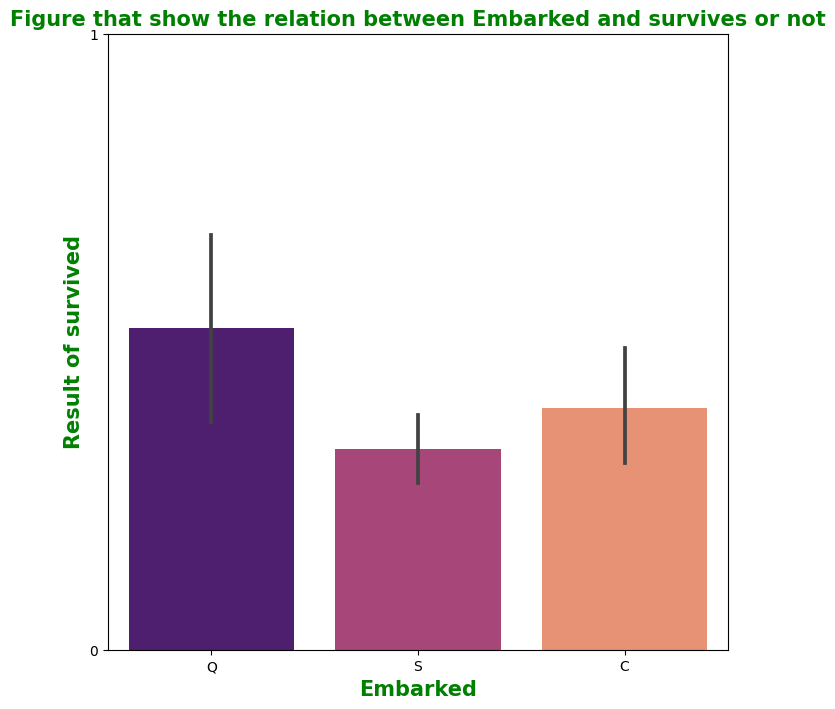

In [23]:
# create a figure that show the relation between Embarked'and survives or not
plt.figure(figsize=(8,8),clear=False)
sns.barplot(data=Data,x="Embarked",y="Survived",palette="magma")
font={"size":15, "weight":"bold","color":"green"}
plt.xlabel("Embarked",fontdict=font)
plt.ylabel("Result of survived",fontdict=font)
plt.yticks([0,1])
plt.title("Figure that show the relation between Embarked and survives or not",fontdict=font)

#  Data preprocessing

In [24]:
# first remove unnessacry data such as name coulmn , tickt 
print(obj_col)
print(num_col)


['Name', 'Sex', 'Ticket', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [25]:
col_drop=["Ticket","Name","PassengerId","Fare","Age"]
Data=Data.drop(col_drop,axis=1)

In [26]:
# convert object data into numerical data 
Data.head(10)

,Survived,Pclass,Sex,SibSp,Parch,Embarked
0,0,3,male,0,0,Q
1,1,3,female,1,0,S
2,0,2,male,0,0,Q
3,0,3,male,0,0,S
4,1,3,female,1,1,S
5,0,3,male,0,0,S
6,1,3,female,0,0,Q
7,0,2,male,1,1,S
8,1,3,female,0,0,C
9,0,3,male,2,0,S


In [27]:
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
# apply label encoder on sex column 
# apply onehot on embarked column
Lb=LabelEncoder()
On=OneHotEncoder()
Data['Sex'] = Lb.fit_transform(Data['Sex'])

In [28]:
# apply one hot encoder on embarked column
column_to_encode = "Embarked"

# Instantiate the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the selected column
encoded_array = encoder.fit_transform(Data[column_to_encode].values.reshape(-1,1))

# Create a DataFrame from the encoded array with column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out([column_to_encode]))

# Update the original DataFrame with the encoded values
Data.drop(column_to_encode, axis=1, inplace=True)  # Drop the original column
Data = pd.concat([Data, encoded_df], axis=1)  # Concatenate the encoded DataFrame with the original

# Display the updated DataFrame
Data


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,0,0.0,1.0,0.0
1,1,3,0,1,0,0.0,0.0,1.0
2,0,2,1,0,0,0.0,1.0,0.0
3,0,3,1,0,0,0.0,0.0,1.0
4,1,3,0,1,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
413,0,3,1,0,0,0.0,0.0,1.0
414,1,1,0,0,0,1.0,0.0,0.0
415,0,3,1,0,0,0.0,0.0,1.0
416,0,3,1,0,0,0.0,0.0,1.0


In [29]:
Data.tail(5)

,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
413,0,3,1,0,0,0.0,0.0,1.0
414,1,1,0,0,0,1.0,0.0,0.0
415,0,3,1,0,0,0.0,0.0,1.0
416,0,3,1,0,0,0.0,0.0,1.0
417,0,3,1,1,1,1.0,0.0,0.0


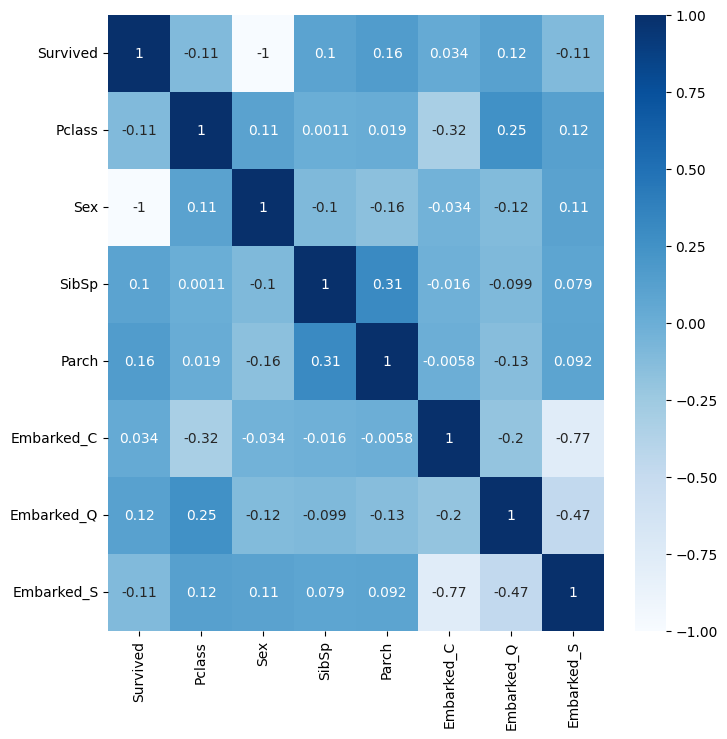

In [30]:
# data corr
plt.figure(figsize=(8, 8))
sns.heatmap(Data.corr(), annot=True, cmap="Blues")
plt.show()

## **Model Building**

In [31]:
# import lib of algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import utils
from sklearn.metrics import accuracy_score  ,  mean_squared_error

In [32]:
# sshuffel data to protect from high varaince
Data=utils.shuffle(Data)
Data

,Survived,Pclass,Sex,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
61,0,2,1,0,0,0.0,0.0,1.0
29,0,3,1,2,0,1.0,0.0,0.0
247,0,2,1,1,1,0.0,0.0,1.0
60,0,3,1,0,0,0.0,0.0,1.0
278,0,2,1,1,0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
181,0,1,1,1,1,1.0,0.0,0.0
370,0,2,1,1,0,0.0,0.0,1.0
325,0,3,1,0,0,0.0,0.0,1.0
213,1,2,0,1,0,0.0,0.0,1.0


In [33]:
Data.isna().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV

lg = LogisticRegression( penalty='l2', solver='liblinear',C=0.01)

X = Data.drop(["Survived"], axis=1)
target_col=["Survived"]
Y = Data[target_col]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True,
                                                    random_state=42, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=0.5,
                                                random_state=42,shuffle=True)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_lg = lg.fit(X_train, Y_train)

predictions = model_lg.predict(X_test)
print(f"train data_shape={X_train.shape}")
print("\n")
print(f"test data_shape={X_test.shape}")
print("\n")


# Validate the model on the validation set
val_predictions = lg.predict(X_val)
val_acc = accuracy_score(Y_val, val_predictions)
print(f"Validation Accuracy: {val_acc*100:.2f}")

# Evaluate the model on the test set
test_predictions = lg.predict(X_test)
test_acc = accuracy_score(Y_test, test_predictions)
print(f"Test Accuracy: {test_acc*100:.2f}")
print("\n")
# Cross-validation
cv_mean_acc = cross_val_score(lg, X_train, Y_train,cv=2)
print(f"Cross-validation scores: {cv_mean_acc.mean() * 100:.2f}")
print(f"Mean CV accuracy: {cv_mean_acc.mean() * 100:.2f}")
print("\n")

# Additional evaluation metrics
mse = mean_squared_error(Y_test, test_predictions)
print(f"Mean Squared Error: {mse*100:.2f}")


train data_shape=(334, 7)


test data_shape=(42, 7)


Validation Accuracy: 69.05
Test Accuracy: 97.62


Cross-validation scores: 100.00
Mean CV accuracy: 100.00


Mean Squared Error: 2.38


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


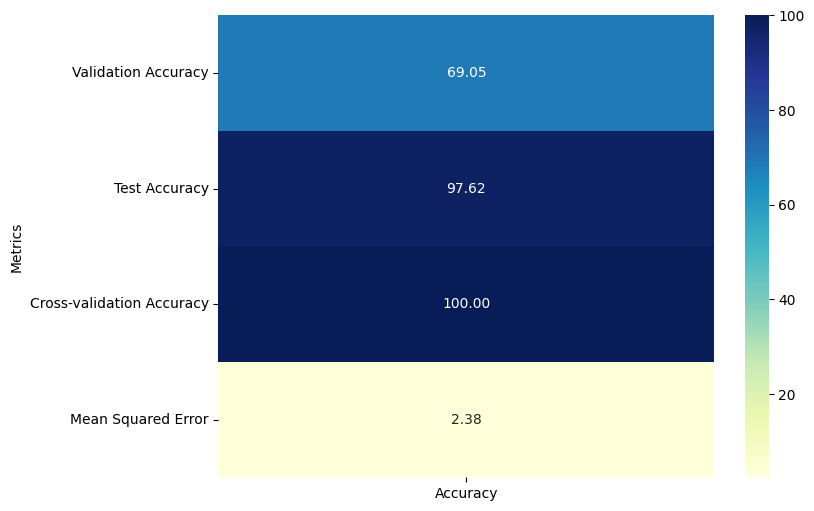

In [39]:
# Accuracy values
accuracy_values = [val_acc*100, test_acc*100, cv_mean_acc.mean() * 100, mse*100]

# Metrics
metrics = ["Validation Accuracy", "Test Accuracy", "Cross-validation Accuracy", "Mean Squared Error"]

# Create a data frame
df = pd.DataFrame(list(zip(metrics, accuracy_values)), columns =['Metrics', 'Accuracy'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.set_index('Metrics'), annot=True, fmt=".2f", cmap='YlGnBu')

# Show the plot
plt.show()

In [40]:
import joblib

# Save the model as a pickle file
joblib.dump(lg, 'logistic rg_model.pkl')


['logistic rg_model.pkl']